# Correlation analyzes of case/death rate with multiple variables in state level (admin1)

This Notebook read the collection of variables at state level collected in this week ([variables](Week3_variables_States.ipynb), [ages ranges](Week3_age_ranges_states.ipynb), [mobility](Week3_mobility_states.ipynb), [population density](Week3_population_density_states.ipynb) and [comorbidities](Week3_comorbidities.ipynb)) and shows the correlation between those variables and the case/death rate through specific areas viewpoints.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from string import ascii_letters
import numpy as np

%matplotlib inline
%reload_ext autoreload
%autoreload 2

The collection of variables is read

In [2]:
dfVar=pd.read_csv('../data/week3_variables_states.csv')
dfAges=pd.read_csv('../data/week3_ages_ranges_states.csv')
dfMobility=pd.read_csv('../data/week3_mobility_states.csv')
dfPopDens=pd.read_csv('../data/week3_population_density_states.csv')
dfComorbidities=pd.read_csv('../data/week3_comorbidities_states.csv')

In [3]:
dfVar.head()

,cve_ent,state,case_rate,case_rate_last_60_days,death_rate,death_rate_last_60_days,population,pct_disability,pct_limitation,pct_mental_problem,pct_no_problems,average_years_finish,pct_no_med_insurance,pct_med_insurance,average_household_size,pct_household_tics,pct_household_no_tics,pct_pop_0_14_years_old,pct_pop_15_64_years_old,pct_pop_65_more_years_old
0,1,AGUASCALIENTES,2003.715231,142.614672,175.375618,2.997278,1434635,4.969487,11.534781,1.405863,82.107156,10.35,18.268619,80.936196,3.68,99.557246,0.442754,26.849687,65.649730,6.766181
1,2,BAJA CALIFORNIA,1475.872026,95.189151,246.226273,5.364707,3634868,4.180207,9.938985,1.444867,88.412151,10.20,23.008181,79.927662,3.26,99.165994,0.834006,24.163271,72.553336,6.747975
2,3,BAJA CALIFORNIA SUR,6340.063725,2027.319226,257.111896,72.075834,804708,4.396999,11.213136,1.295252,82.417100,10.34,16.064212,82.529564,3.30,98.915448,1.084552,24.487516,68.228351,6.028646
3,4,CAMPECHE,1585.521733,509.185832,151.506520,24.684769,1000617,5.222678,11.288635,1.230641,75.280652,9.63,20.317864,71.923323,3.55,95.386710,4.613290,24.096932,61.273494,6.979494
4,5,COAHUILA,2341.893672,190.168763,204.801909,3.634985,3218720,4.188497,9.399482,1.089657,83.380505,10.43,18.559334,78.935353,3.48,99.361293,0.638707,25.608938,64.831517,7.132866


In [4]:
dfAges.head()

,cve_ent,pct_pop_0_4_years_old,pct_pop_5_9_years_old,pct_pop_10_14_years_old,pct_pop_15_19_years_old,pct_pop_20_24_years_old,pct_pop_25_29_years_old,pct_pop_30_34_years_old,pct_pop_35_39_years_old,pct_pop_40_44_years_old,...,pct_pop_55_59_years_old,pct_pop_60_64_years_old,pct_pop_65_69_years_old,pct_pop_70_74_years_old,pct_pop_75_79_years_old,pct_pop_80_84_years_old,pct_pop_85_89_years_old,pct_pop_90_94_years_old,pct_pop_95_99_years_old,pct_pop_100_and_more_years_old
0,1,8.673286,8.673286,9.041812,9.198646,8.853820,8.254783,7.446145,6.918624,6.439129,...,4.103134,3.367128,2.497011,1.783450,1.155764,0.710006,0.388670,0.167987,0.055484,0.007807
1,2,7.326291,7.326291,8.593104,8.683644,9.363724,9.030424,8.319119,8.035202,7.527399,...,4.639866,3.687122,2.605432,1.799928,1.124498,0.693395,0.342543,0.133650,0.041597,0.006933
2,3,7.761200,7.761200,8.408640,8.135746,8.294064,8.549437,8.422807,8.068393,7.380193,...,4.191707,3.367060,2.395155,1.558951,1.014778,0.577725,0.317631,0.116315,0.041257,0.006835
3,4,7.888633,7.888633,8.011857,7.609305,7.550941,7.275311,7.266417,7.023167,6.413043,...,4.077984,3.275779,2.578009,1.754817,1.190865,0.753135,0.441028,0.176691,0.070057,0.014891
4,7,10.019463,10.019463,10.176172,9.189237,8.106339,7.406210,6.911337,6.506791,5.744903,...,3.426569,2.769910,2.194920,1.498246,1.102163,0.667409,0.381110,0.154493,0.067273,0.025286


In [5]:
dfMobility.head()

,cve_ent,state,retail_and_recreation_mobility,grocery_and_pharmacy_mobility,parks_percent_mobility,transit_stations_mobility,workplaces_mobility,residential_mobility
0,1,AGUASCALIENTES,25.425819,-0.716763,26.267823,33.957611,17.951830,-9.001927
1,2,BAJA CALIFORNIA,23.980732,-4.487476,24.398844,19.418112,17.337187,-8.799615
2,3,BAJA CALIFORNIA SUR,29.959538,7.406551,29.190751,23.556840,23.728324,-9.028902
3,4,CAMPECHE,33.084778,6.949904,40.766859,30.210019,22.940270,-11.789981
4,5,COAHUILA,22.452794,0.635838,29.102119,23.630058,16.306358,-8.344894


In [6]:
dfPopDens.head()

,Unnamed: 0,cve_ent,population/sqkm
0,0,1,258.089437
1,1,2,49.442754
2,2,3,10.878742
3,3,4,17.476649
4,4,5,21.362540


In [7]:
dfComorbidities.head()

,cve_ent,state,pct_pop_obesity,pct_pop_hypertension,pct_pop_diabetes
0,1,Aguascalientes,32.593387,14.700566,7.556478
1,2,Baja California,48.366995,21.007712,9.974848
2,3,Baja California Sur,42.849118,16.536911,8.369750
3,4,Campeche,44.903811,26.108154,14.007917
4,5,Coahuila de Zaragoza,37.606715,22.397551,12.343806


All the variables are merged into one dataframe

In [8]:
dfAll = pd.merge(dfVar,dfAges,on=['cve_ent'])

In [9]:
dfAll = pd.merge(dfAll,dfMobility,on=['cve_ent'])

In [10]:
dfAll = pd.merge(dfAll,dfPopDens,on=['cve_ent'])

In [11]:
dfAll = pd.merge(dfAll,dfComorbidities,on=['cve_ent'])

## Heatmap of health variables correlation with case/death rate 

All the variables related to health and the case/death rate are selected 

In [12]:
dfHealth = dfAll[['case_rate', 'case_rate_last_60_days',
       'death_rate', 'death_rate_last_60_days',
       'pct_disability', 'pct_limitation', 'pct_mental_problem',
       'pct_no_problems', 'pct_pop_obesity', 'pct_pop_hypertension',
       'pct_pop_diabetes']].copy()

The correlation between the health and the case/death rate is as following

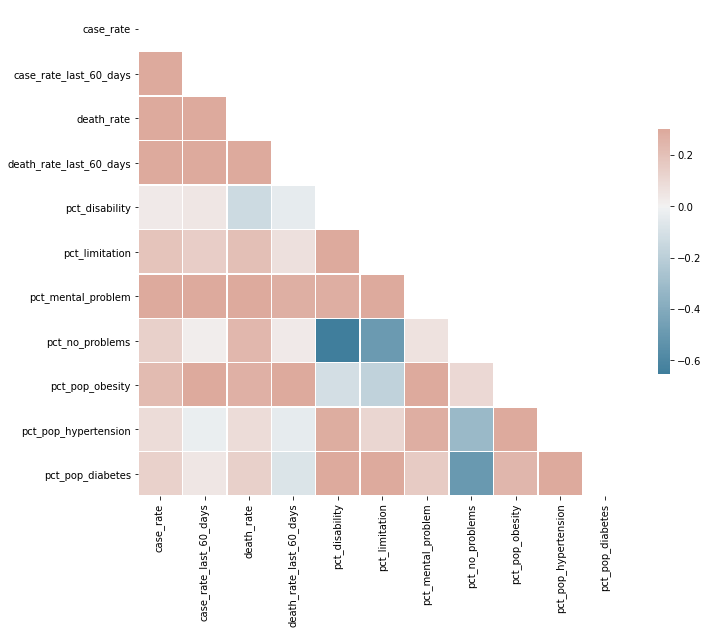

In [13]:
corr = dfHealth.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
heatmap=sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
heatmap = heatmap.get_figure()
heatmap.savefig("../figures/Correlation_Health_state.png", bbox_inches="tight")

The most significant correlations in the health area were people with mental problems, with no health problems and with comorbiditites such as obesity:

We assume that there is a strong correlation in people with mental problems is because in the mental problems variables is consider depression which is a leading cause to immunosuppression meaning that this people were more suceptible to contract the infection and die from it due the low state that there defenses were. Well people with no health problems precisely because they do not have any issues they were able to keep transiting meaning that they were more exposed to the virus. 

In the comorbodities we assume this people have a deteriorate health condition which makes they more suceptible to contract the infection and die from it. It is also necessary to remark that the obesity has the stronger correlation because of 2 reasons that we assume, the first its because theres a high percentage of obesity in the country making it the top 3 country with the highest obese population ([OECD](https://www.oecd.org/health/obesity-update.htm)), the second reason is because due that this comorbiditite not only implies a high density of body fat but also implies a cardiopulmonary deteriorate condition which could lead to the development of other diseases making the person weaker to the infection.

## Heatmap of Age variables correlation with case/death rate

All the variables related to age and the case/death rate are selected

In [14]:
dfAge = dfAll[['case_rate', 'case_rate_last_60_days',
       'death_rate', 'death_rate_last_60_days',
       'pct_pop_0_4_years_old', 'pct_pop_5_9_years_old',
       'pct_pop_10_14_years_old', 'pct_pop_15_19_years_old',
       'pct_pop_20_24_years_old', 'pct_pop_25_29_years_old',
       'pct_pop_30_34_years_old', 'pct_pop_35_39_years_old',
       'pct_pop_40_44_years_old', 'pct_pop_45_49_years_old',
       'pct_pop_50_54_years_old', 'pct_pop_55_59_years_old',
       'pct_pop_60_64_years_old', 'pct_pop_65_69_years_old',
       'pct_pop_70_74_years_old', 'pct_pop_75_79_years_old',
       'pct_pop_80_84_years_old', 'pct_pop_85_89_years_old',
       'pct_pop_90_94_years_old', 'pct_pop_95_99_years_old',
       'pct_pop_100_and_more_years_old']].copy()

The correlation between the age and the case/death rate is as following

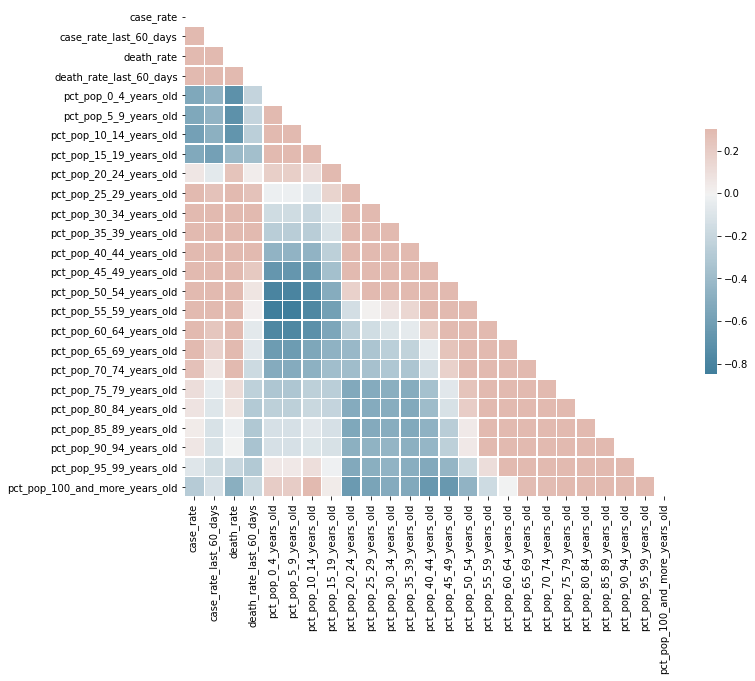

In [15]:
corr = dfAge.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
heatmap=sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
heatmap = heatmap.get_figure()
heatmap.savefig("../figures/Correlation_Age_state.png", bbox_inches="tight")

We can see that the correlation between people who are 0 to 19 years old is negative this is due the fact that their age limit them to transit so they were more isolated, it also affects that this age group did not transit in the pandemic since the goverment established online school modality, in the case of people who are 20 to 59 years old they could transit so they were more in contact with the virus, finally people 50 or more years old were also vulnerable to the infection but due their age, which comes with health deterioration, and the death rate they were more suceptible to die that is why their is a positive correlation, but still mentioned the above in the last 60 days that positive correlation behaviour has change into a negative this is due the vaccine plan that the goverment of Mexico implment in which the elderly (50 or more years old) would recive the proper COVID-19 vaccination ([GOBIERNO DE MEXICO](https://coronavirus.gob.mx/wp-content/uploads/2021/05/11May2021_PNVx_COVID.pdf)) this dropped the both case and death rate correlation on this ranges of age.

NEEDD TO UPDATE

## Heatmap of Socioeconomic and Education variables correlation with case/death rate

All the variables related to socioeconomic and education factors and the case/death rate are selected

In [16]:
dfSocioeconomicEducation = dfAll[['case_rate', 'case_rate_last_60_days',
       'death_rate', 'death_rate_last_60_days','pct_no_med_insurance',
       'pct_med_insurance','average_years_finish','average_household_size', 
       'pct_household_tics','pct_household_no_tics']].copy()

The correlation between the socioeconomic and education factors and the case/death rate is as following

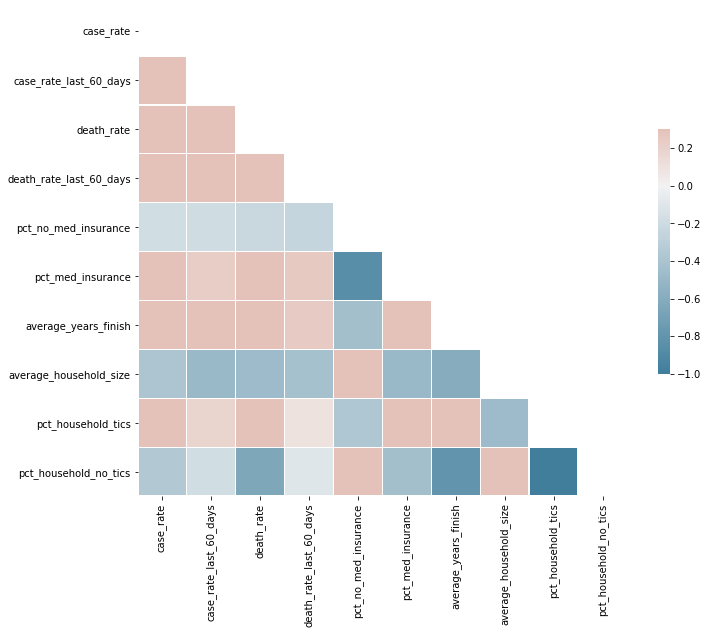

In [17]:
corr = dfSocioeconomicEducation.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
heatmap=sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
heatmap = heatmap.get_figure()
heatmap.savefig("../figures/Correlation_SocioEconomic_state.png", bbox_inches="tight")

The correlation between people who has medical medical insurance and household with technologies of information and communication (TIC's) is positve due that those people and household are located in high transit areas such as cities making them more suceptible to the virus, well with people who do not has medical insurance or TIC's vicerversa because this people transit in rural areas making them less suceptible. The previous assuption also applies to the average years of education finished because states with higher averages are the ones with more urban areas.

In the case of the household size their is not that much of a positive correlation due to the recommendations to prevent the contraction of the virus in ones household that were followed ([IMSS](http://www.imss.gob.mx/prensa/archivo/202006/382#:~:text=Mantener%20la%20sana%20distancia%20de,el%20retorno%20a%20las%20actividades)), and also because in the residential areas we assume a low transit to this recommendations.

## Heatmap of population variables correlation with case/death rate

All the variables related to population factors and the case/death rate are selected

In [18]:
dfPopulation = dfAll[['case_rate','case_rate_last_60_days',
       'death_rate', 'death_rate_last_60_days',
       'retail_and_recreation_mobility', 
        'grocery_and_pharmacy_mobility',
        'parks_percent_mobility',
        'transit_stations_mobility',
        'workplaces_mobility',
        'residential_mobility',
       'population/sqkm']].copy()

The correlation between the population factors and the case/death rate is as following

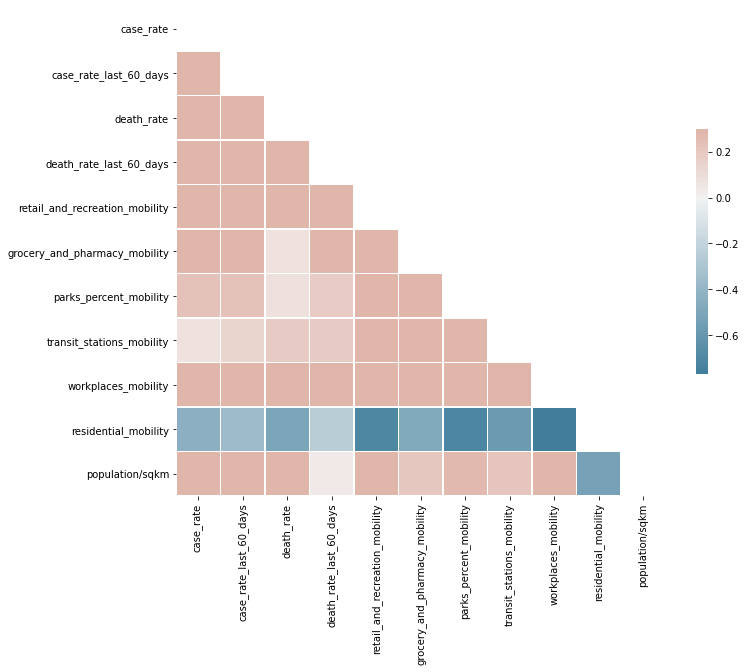

In [19]:
corr = dfPopulation.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
heatmap=sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
heatmap = heatmap.get_figure()
heatmap.savefig("../figures/Correlation_Population_state.png", bbox_inches="tight")

The correlation between all the mobilities except the residential one are positive this is due that even with all the recommendations that the goverment proposed in the pandemic those areas were still transited meaning that in those areas were centers to contract the virus, meanwhile in the residential area there was not that much transit due to the fear of the general population to infect people close to them where they live.

In the case of the population density (population/sqkm) the correlation was positve because in the areas with higher population density the transit was also high meaning that the probability to contract the virus and also die from it is also high, meaning that the population density can be the decisive factor when it comes to include the mobility and to locate urban and rural areas.

The variables and the region codes are selected of the dataframe for future storage

In [20]:
dfFinal = dfAll[['cve_ent', 'case_rate', 'case_rate_last_60_days',
       'death_rate', 'death_rate_last_60_days',
       'pct_disability', 'pct_limitation', 'pct_mental_problem',
       'pct_no_problems', 'pct_no_med_insurance','pct_med_insurance',
        'pct_pop_obesity', 'pct_pop_hypertension',
       'pct_pop_diabetes',
       'pct_pop_0_4_years_old', 'pct_pop_5_9_years_old',
       'pct_pop_10_14_years_old', 'pct_pop_15_19_years_old',
       'pct_pop_20_24_years_old', 'pct_pop_25_29_years_old',
       'pct_pop_30_34_years_old', 'pct_pop_35_39_years_old',
       'pct_pop_40_44_years_old', 'pct_pop_45_49_years_old',
       'pct_pop_50_54_years_old', 'pct_pop_55_59_years_old',
       'pct_pop_60_64_years_old', 'pct_pop_65_69_years_old',
       'pct_pop_70_74_years_old', 'pct_pop_75_79_years_old',
       'pct_pop_80_84_years_old', 'pct_pop_85_89_years_old',
       'pct_pop_90_94_years_old', 'pct_pop_95_99_years_old',
       'pct_pop_100_and_more_years_old',
       'average_years_finish','average_household_size', 'pct_household_tics','pct_household_no_tics', 
       'retail_and_recreation_mobility', 
       'grocery_and_pharmacy_mobility',
       'parks_percent_mobility',
       'transit_stations_mobility',
       'workplaces_mobility',
       'residential_mobility',
       'population/sqkm']].copy()

The dataframe is stored

In [21]:
dfFinal.to_csv('../data/week3analyzesStates.csv',index=False)